In [1]:
# Pisos totales

d = {}

with open('pisosR.csv') as f:
    lineas = f.readlines()
    for l in lineas[1:]:
        lin = l.split(',')
        distrito = str(lin[16].strip())
        distrito = str(distrito.replace('"', ''))
        if distrito not in d:
            d[distrito] = 1
        else:
            d[distrito] += 1
        
d_suma = d        
print(d_suma)

{'ciutat vella': 234, 'camins al grau': 92, 'poblats marÃ\xadtims': 284, "l'eixample": 225, 'el pla del real': 85, 'patraix': 160, "l'olivereta": 104, 'benicalap': 103, 'quatre carreres': 170, 'campanar': 95, 'extramurs': 170, 'la saÃ¯dia': 116, 'rascanya': 153, 'benimaclet': 23, 'jesÃºs': 122, 'algirÃ³s': 63, "pobles de l'oest": 20, 'pobles del sud': 67, 'pobles del nord': 5}


In [2]:
# Precio medio

d = {}

with open('pisosR.csv') as f:
    lineas = f.readlines()
    for l in lineas[1:]:
        lin = l.split(',')
        distrito = str(lin[16].strip())
        distrito = str(distrito.replace('"', ''))
        precio = float(lin[15].strip())
        if distrito not in d:
            d[distrito] = precio
        else:
            d[distrito] += precio
            
d_precio = d

d_media_precio = {}
for k, v in d_suma.items():
    d_media_precio[k] = d_precio[k] / d_suma[k]

print(d_media_precio)

{'ciutat vella': 466075.08974358975, 'camins al grau': 230474.78260869565, 'poblats marÃ\xadtims': 180758.5105633803, "l'eixample": 497390.8888888889, 'el pla del real': 575497.8352941177, 'patraix': 154835.7375, "l'olivereta": 113301.63461538461, 'benicalap': 171039.85436893205, 'quatre carreres': 184269.36470588236, 'campanar': 288115.34736842103, 'extramurs': 280628.4117647059, 'la saÃ¯dia': 150650.6896551724, 'rascanya': 122020.69934640524, 'benimaclet': 172391.26086956522, 'jesÃºs': 125693.12295081967, 'algirÃ³s': 222723.80952380953, "pobles de l'oest": 113074.5, 'pobles del sud': 125853.53731343284, 'pobles del nord': 116500.0}


In [3]:
# Número de días medio en el mercado

d = {}

with open('pisosR.csv') as f:
    lineas = f.readlines()
    for l in lineas[1:]:
        lin = l.split(',')
        dias = int(lin[20].strip())
        distrito = str(lin[16].strip())
        distrito = str(distrito.replace('"', ''))
        if distrito not in d:
            d[distrito] = dias
        else:
            d[distrito] += dias

d_dias = d

d_media_dias = {}
for k, v in d_suma.items():
    d_media_dias[k] = d_dias[k] / d_suma[k]

print(d_media_dias)

{'ciutat vella': 24.94017094017094, 'camins al grau': 16.304347826086957, 'poblats marÃ\xadtims': 25.778169014084508, "l'eixample": 24.16888888888889, 'el pla del real': 28.105882352941176, 'patraix': 21.35625, "l'olivereta": 19.451923076923077, 'benicalap': 16.9126213592233, 'quatre carreres': 29.54705882352941, 'campanar': 13.263157894736842, 'extramurs': 23.888235294117646, 'la saÃ¯dia': 21.939655172413794, 'rascanya': 20.633986928104576, 'benimaclet': 19.565217391304348, 'jesÃºs': 15.532786885245901, 'algirÃ³s': 20.238095238095237, "pobles de l'oest": 10.4, 'pobles del sud': 26.746268656716417, 'pobles del nord': 13.6}


{'ciutat vella': 361409.2715461009, 'camins al grau': 170250.64131577007, 'poblats marÃ\xadtims': 111015.97105484374, "l'eixample": 361157.36147878924, 'el pla del real': 488965.8940091918, 'patraix': 54284.83935956326, "l'olivereta": 52555.95490871127, 'benicalap': 137342.82541663904, 'quatre carreres': 91728.58555945131, 'campanar': 128384.58268062926, 'extramurs': 126217.18605411341, 'la saÃ¯dia': 69506.89510232605, 'rascanya': 76243.93255997663, 'benimaclet': 68976.1940799725, 'jesÃºs': 58575.76340967199, 'algirÃ³s': 65454.96383200769, "pobles de l'oest": 53918.137530426626, 'pobles del sud': 72450.22085878975, 'pobles del nord': 19336.183697927572}


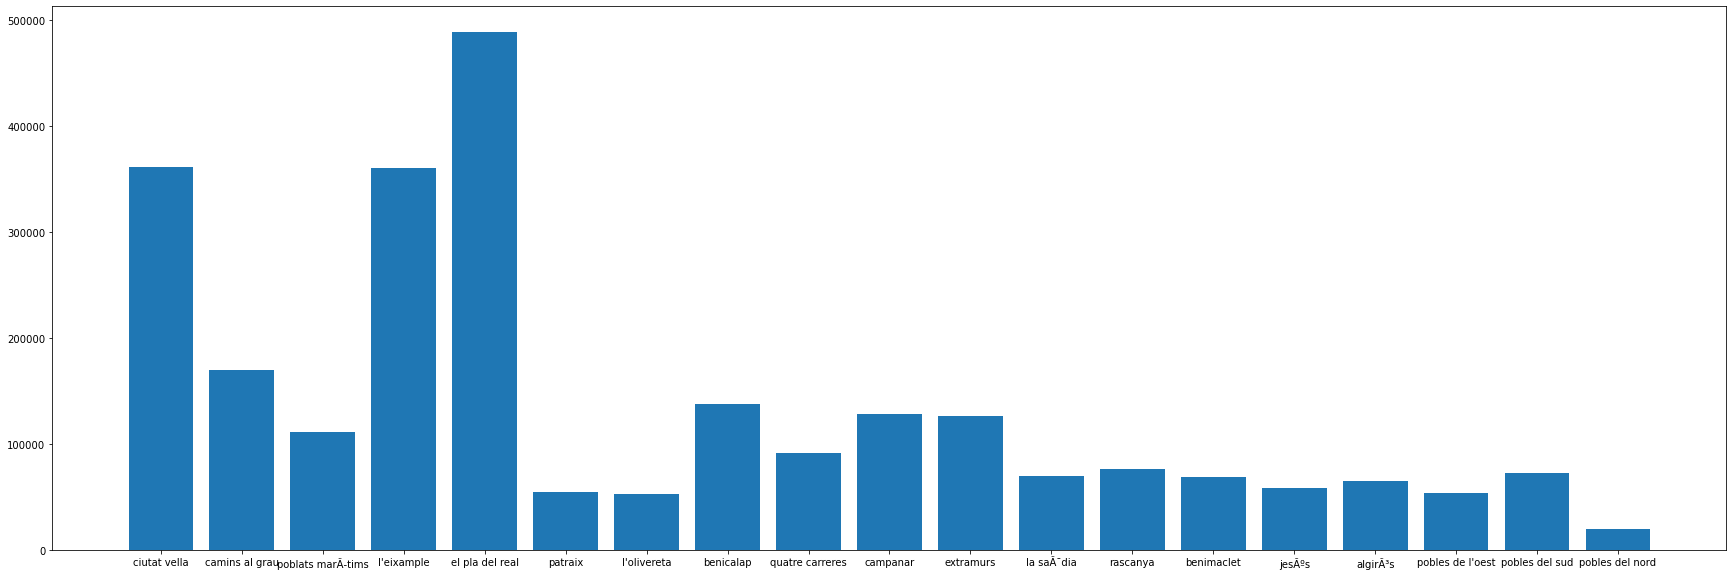

In [4]:
# desviación = homogeneidad

import matplotlib.pyplot as plt
import math

d = {}

with open('pisosR.csv') as f:
    lineas = f.readlines()
    for l in lineas[1:]:
        lin = l.split(',')
        distrito = str(lin[16].strip())
        distrito = str(distrito.replace('"', ''))
        precio = float(lin[15].strip())
        resta = (precio-d_media_precio[distrito])**2
        if distrito not in d:
            d[distrito] = resta
        else:
            d[distrito] += resta

d_resta = d

d_desv = {}
for k, v in d_suma.items():
    d_desv[k] = math.sqrt(d_resta[k] / d_suma[k])

print(d_desv)


plt.figure(figsize=(30,10))
plt.bar(d_desv.keys(), d_desv.values())
plt.show()

In [5]:
# preparamos el archivo csv

import csv

lista = [['distrito', 'num_pisos', 'precio_medio', 'dias_medio', 'desviación']]

for k, v in d_suma.items():
    lista.append([k, v, round(d_media_precio[k],2), round(d_media_dias[k],2), round(d_desv[k], 2)])
    
with open('pisos_graficar.csv', 'w', encoding = 'UTF-8') as f:
    writer = csv.writer(f)
    writer.writerows(lista)